Task 2 - Customer Segmentation Using RFM Analysis

In [1]:
import pandas as pd
import csv
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
retail = pd.read_csv(r"C:\Users\Lenovo\Downloads\retail\online_retail.csv")

In [3]:
retail.info()
#description, customerid

<class 'pandas.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  str    
 1   StockCode    541909 non-null  str    
 2   Description  540455 non-null  str    
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  str    
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  str    
dtypes: float64(2), int64(1), str(5)
memory usage: 33.1 MB


In [4]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])
retail['CustomerID'] = retail['CustomerID'].astype(str)

In [5]:
retail.duplicated().sum()
retail = retail.drop_duplicates()

In [6]:
retail = retail[retail['Quantity'] > 0]
retail = retail[retail['UnitPrice'] > 0]

In [7]:
retail = retail[~retail['InvoiceNo'].str.startswith('C')]

In [8]:
retail.describe()


,Quantity,InvoiceDate,UnitPrice
count,524878.000000,524878,524878.000000
mean,10.616600,2011-07-04 15:30:16.317049,3.922573
min,1.000000,2010-12-01 08:26:00,0.001000
25%,1.000000,2011-03-28 12:13:00,1.250000
50%,4.000000,2011-07-20 11:22:00,2.080000
75%,11.000000,2011-10-19 11:41:00,4.130000
max,80995.000000,2011-12-09 12:50:00,13541.330000
std,156.280031,NaN,36.093028


In [9]:
retail['Revenue'] = retail['Quantity'] * retail['UnitPrice']

In [10]:
retail['Revenue'].sum()

np.float64(10642110.804000001)

In [11]:
monetary = retail.groupby('CustomerID')['Revenue'].sum().reset_index()
monetary.columns = ['CustomerID','Monetary']
monetary.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [12]:
frequency = retail.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency.columns = ['CustomerID','Frequency']
frequency.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [13]:
reference_date = retail['InvoiceDate'].max() + pd.Timedelta(days=1)

In [14]:
recency = retail.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency['Recency'] = (reference_date - recency['InvoiceDate']).dt.days
recency = recency[['CustomerID','Recency']]
recency.head()

,CustomerID,Recency
0,12346.0,326
1,12347.0,2
2,12348.0,75
3,12349.0,19
4,12350.0,310


In [15]:
rfm = recency.merge(frequency, on='CustomerID').merge(monetary, on='CustomerID')
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


In [16]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,12346.0,326,1,77183.60,1,1,5
1,12347.0,2,7,4310.00,5,5,5
2,12348.0,75,4,1797.24,2,4,4
3,12349.0,19,1,1757.55,4,1,4
4,12350.0,310,1,334.40,1,1,2


In [ ]:
rfm['RFM_Score'] = rfm['R_Score'].astype(int) + rfm['F_Score'].astype(int) + rfm['M_Score'].astype(int)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,12346.0,326,1,77183.60,1,1,5,7
1,12347.0,2,7,4310.00,5,5,5,15
2,12348.0,75,4,1797.24,2,4,4,10
3,12349.0,19,1,1757.55,4,1,4,9
4,12350.0,310,1,334.40,1,1,2,4


In [18]:
segments = []

for x in rfm.itertuples():
        if x.RFM_Score >= 13:
            segments.append('Champions')
        elif x.RFM_Score >= 10:
            segments.append('Loyal')
        elif x.RFM_Score >= 7:
            segments.append('Potential')
        elif x.RFM_Score >= 4:
            segments.append('At Risk')
        else:
            segments.append('Lost')

In [19]:
rfm['rfm_segmentations'] = segments

In [20]:
rfm.head(10)

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,rfm_segmentations
0,12346.0,326,1,77183.60,1,1,5,7,Potential
1,12347.0,2,7,4310.00,5,5,5,15,Champions
2,12348.0,75,4,1797.24,2,4,4,10,Loyal
3,12349.0,19,1,1757.55,4,1,4,9,Potential
4,12350.0,310,1,334.40,1,1,2,4,At Risk
5,12352.0,36,8,2506.04,3,5,5,13,Champions
6,12353.0,204,1,89.00,1,1,1,3,Lost
7,12354.0,232,1,1079.40,1,1,4,6,At Risk
8,12355.0,214,1,459.40,1,1,2,4,At Risk
9,12356.0,23,3,2811.43,4,3,5,12,Loyal


In [26]:
rfm.groupby('rfm_segmentations')['CustomerID'].count().reset_index(name = 'num_customers')

,rfm_segmentations,num_customers
0,At Risk,1124
1,Champions,933
2,Lost,183
3,Loyal,1010
4,Potential,1088


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24036\2527383492.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')


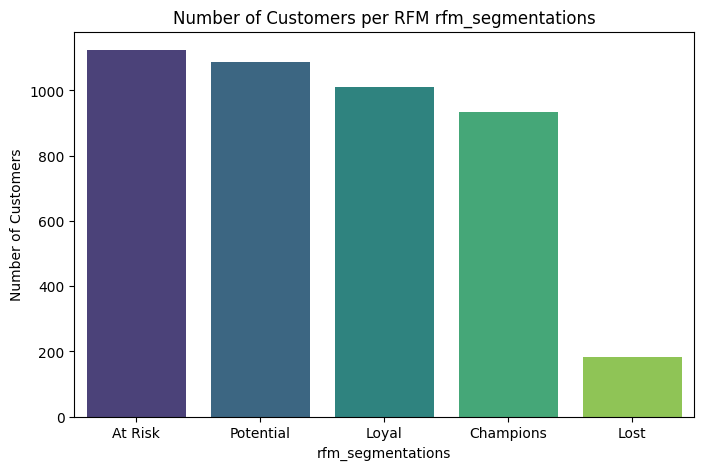

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

segment_counts = rfm['rfm_segmentations'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')
plt.title("Number of Customers per RFM rfm_segmentations")
plt.ylabel("Number of Customers")
plt.xlabel("rfm_segmentations")
plt.show()

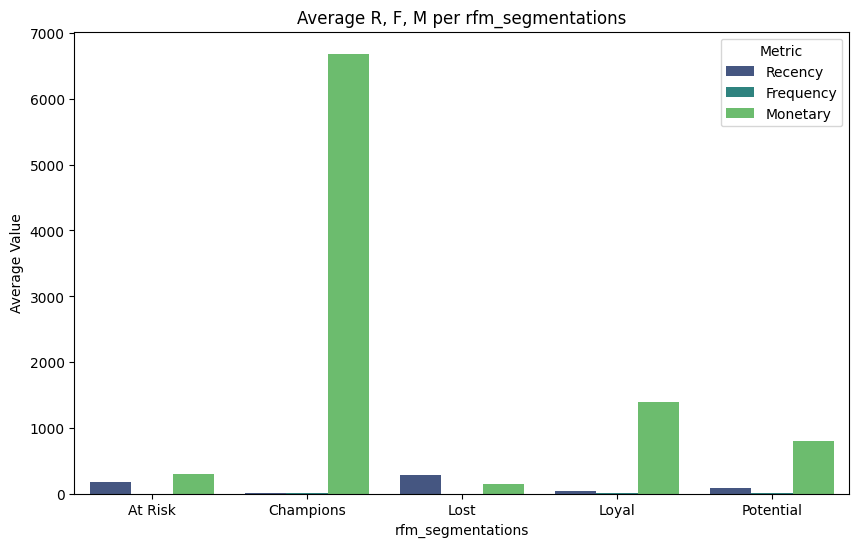

In [32]:
rfm_avg = rfm.groupby('rfm_segmentations')[['Recency','Frequency','Monetary']].mean().reset_index()

rfm_avg_melt = rfm_avg.melt(id_vars='rfm_segmentations', value_vars=['Recency','Frequency','Monetary'],
                            var_name='Metric', value_name='Average')

plt.figure(figsize=(10,6))
sns.barplot(x='rfm_segmentations', y='Average', hue='Metric', data=rfm_avg_melt, palette='viridis')
plt.title("Average R, F, M per rfm_segmentations")
plt.ylabel("Average Value")
plt.xlabel("rfm_segmentations")
plt.show()

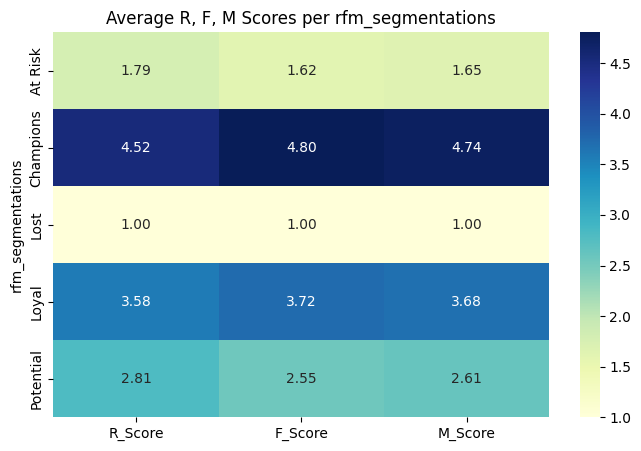

In [38]:
rfm['R_Score'] = rfm['R_Score'].astype(int)
rfm['F_Score'] = rfm['F_Score'].astype(int)
rfm['M_Score'] = rfm['M_Score'].astype(int)
rfm_scores = rfm.groupby('rfm_segmentations')[['R_Score','F_Score','M_Score']].mean()

plt.figure(figsize=(8,5))
sns.heatmap(rfm_scores, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title("Average R, F, M Scores per rfm_segmentations")
plt.show()

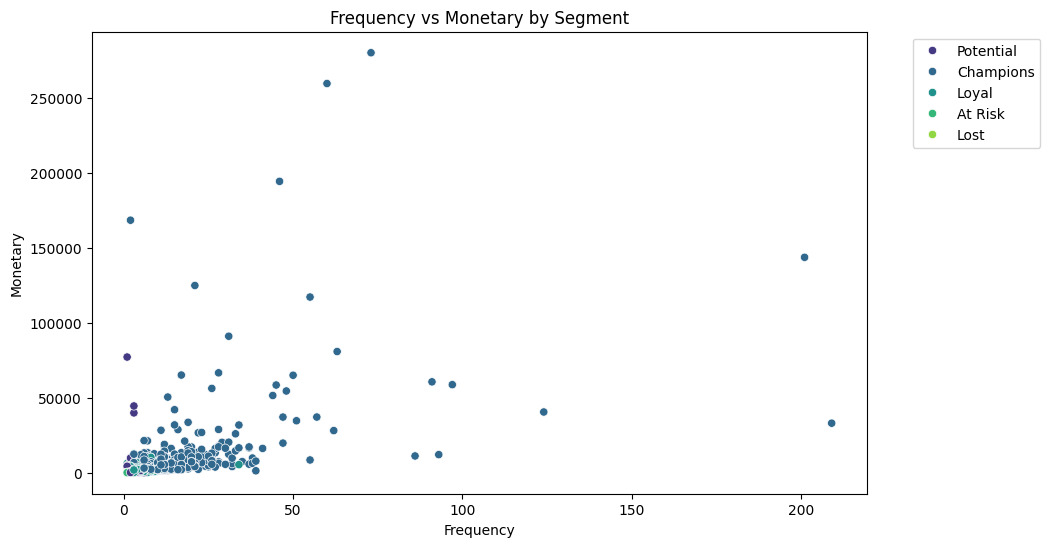

In [41]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Frequency', y='Monetary', hue='rfm_segmentations', data=rfm, palette='viridis')
plt.title("Frequency vs Monetary by Segment")
plt.xlabel("Frequency")
plt.ylabel("Monetary")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()